In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [14]:
autism_df = pd.read_csv("autism.csv")
autism_df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [15]:
autism_df.shape

(800, 22)

In [16]:
autism_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [17]:
autism_df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [18]:
autism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [19]:
autism_df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [21]:
pd.set_option("display.max.column", None)

In [22]:
print(autism_df)

      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  A10_Score        age gender  \
0           1         0         1          1  38.172746      f   
1  

In [23]:
autism_df["age"] = autism_df["age"].astype(int)

In [25]:
autism_df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [26]:
numerical_features = ["ID", "age", "result"]

for col in autism_df.columns:
    if col not in numerical_features:
        print(f"Column: {col}")
        print(autism_df[col].unique())
        print(","*50)

Column: A1_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A2_Score
[0 1]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A3_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A4_Score
[0 1]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A5_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A6_Score
[0 1]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A7_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A8_Score
[0 1]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A9_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: A10_Score
[1 0]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: gender
['f' 'm']
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Column: ethnicity
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [27]:
autism_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [29]:
autism_df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [30]:
mapping = {"Viet Nam":"vietnam", "AmericanSamoa":"United states","Hong Kong": "china"}
autism_df["contry_of_res"] = autism_df["contry_of_res"].replace(mapping)

In [32]:
autism_df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [33]:
autism_df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [34]:
autism_df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [35]:
sns.set_theme(style = "darkgrid")

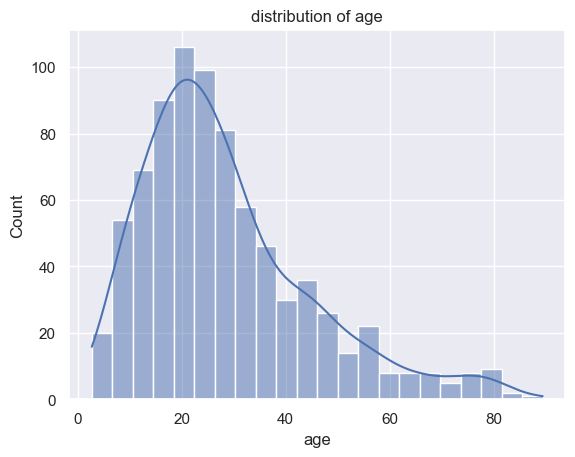

C:\Users\prince\AppData\Local\Temp\ipykernel_21604\1441451766.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


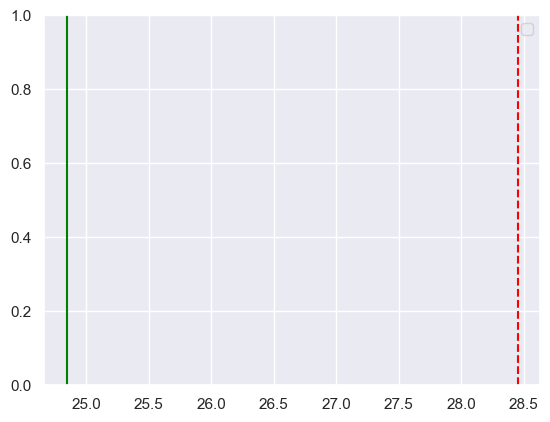

In [47]:
sns.histplot(df["age"],kde=True)
plt.title("distribution of age")
plt.show()

age_mean = df["age"].mean()
age_median = df["age"].median()


plt.legend()

plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")


plt.show()

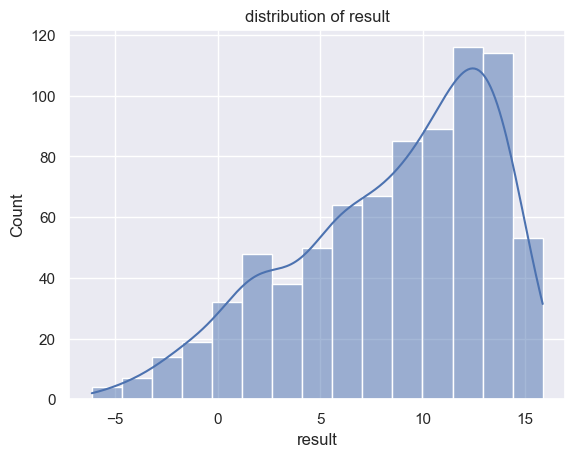

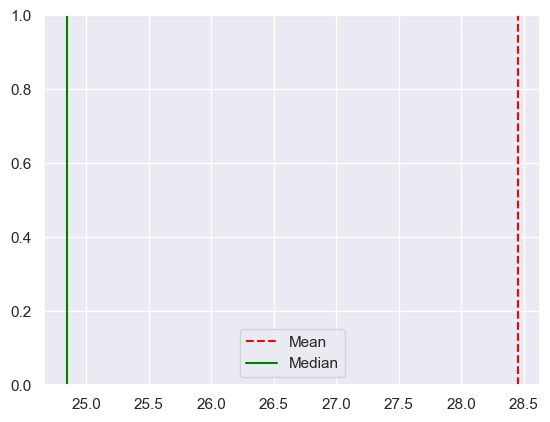

In [51]:
sns.histplot( autism_df["result"],kde=True)
plt.title("distribution of result")
plt.show()

result_mean = autism_df["result"].mean()
result_median = autism_df["result"].median()




plt.axvline(age_mean, color="red", linestyle="--", label= "Mean")
plt.axvline(age_median, color="green", linestyle="-", label= "Median")
plt.legend()

plt.show()

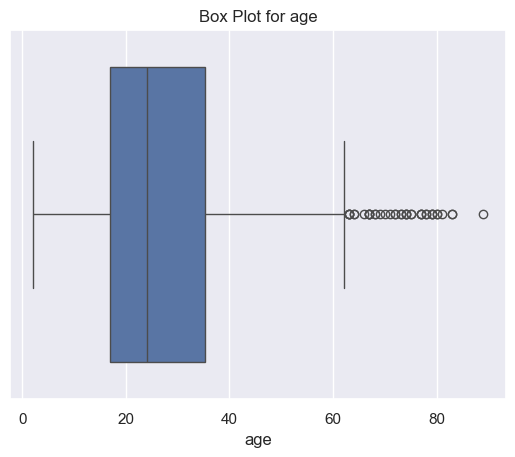

In [53]:
sns.boxplot(x=autism_df["age"])
plt.title("Box Plot for age")
plt.xlabel("age")
plt.show()

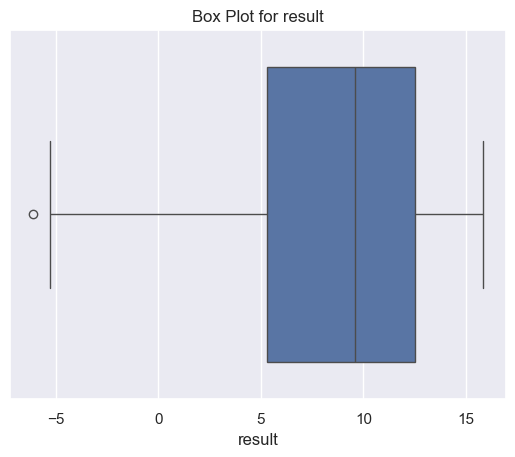

In [54]:
sns.boxplot(x=autism_df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [70]:
Q1 = autism_df["result"].quantile(0.25)
Q3 =  autism_df["result"].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

result_outlier = autism_df[(autism_df["result"] < lower_bound) | (autism_df["result"] > upper_bound)]

In [72]:
len(result_outlier)

1

In [86]:
autism_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

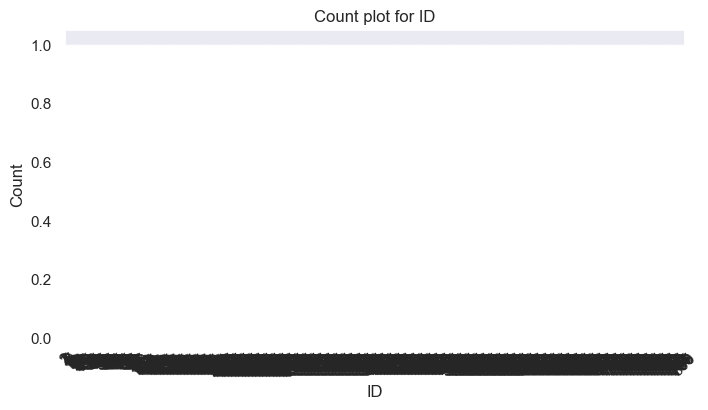

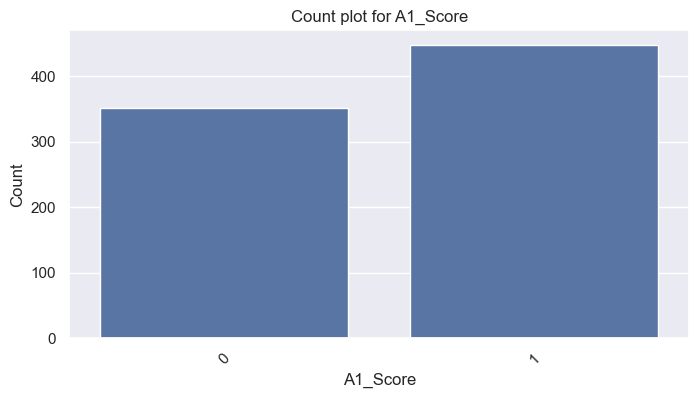

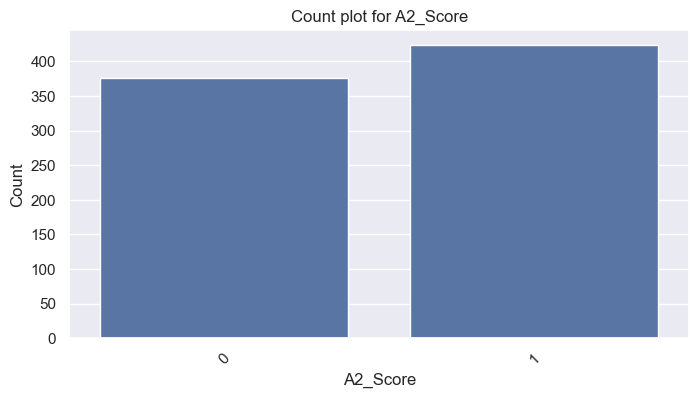

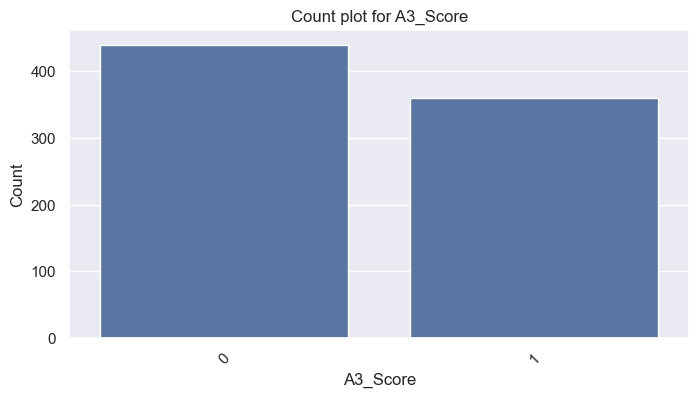

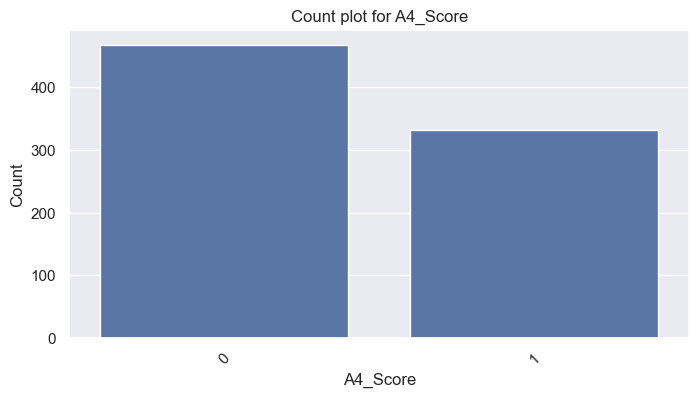

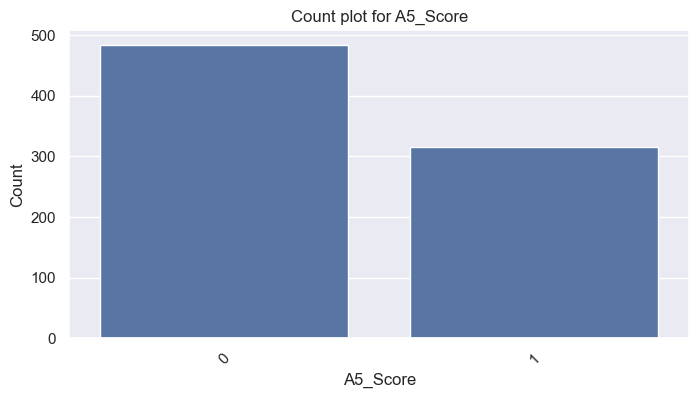

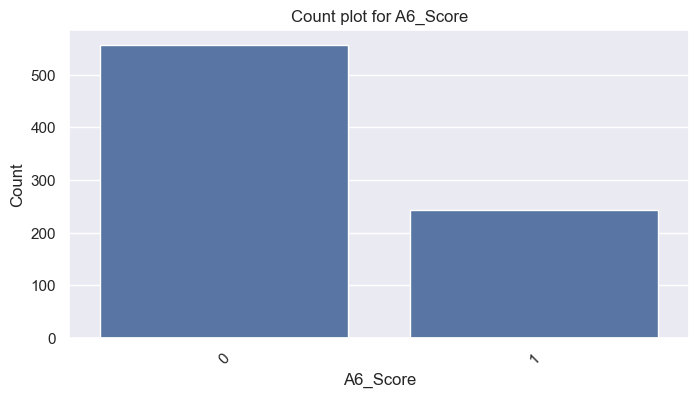

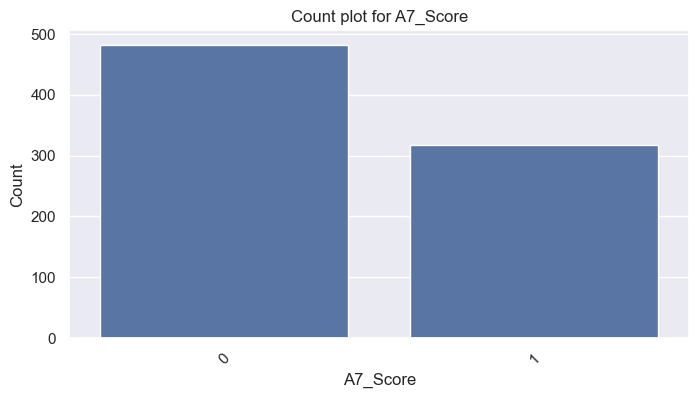

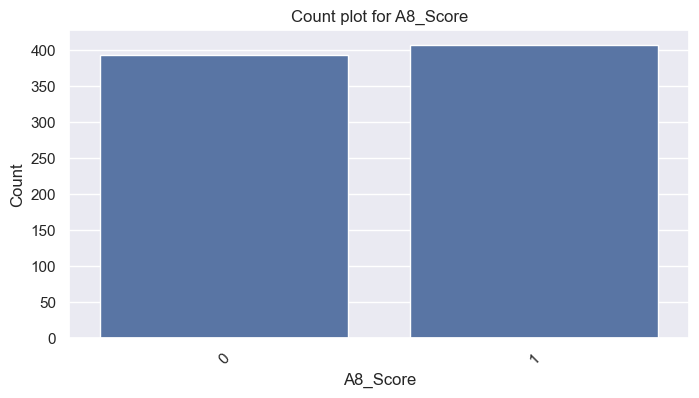

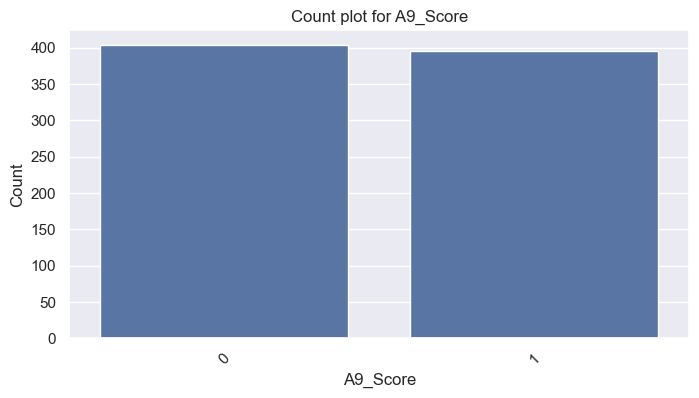

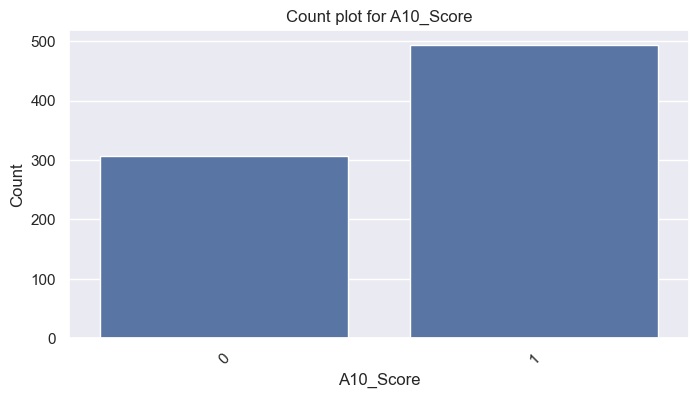

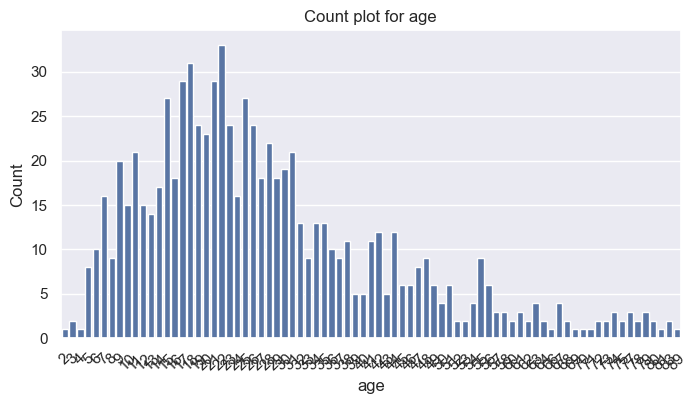

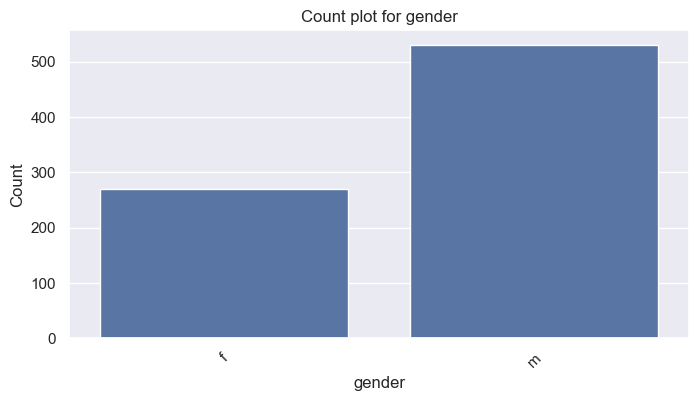

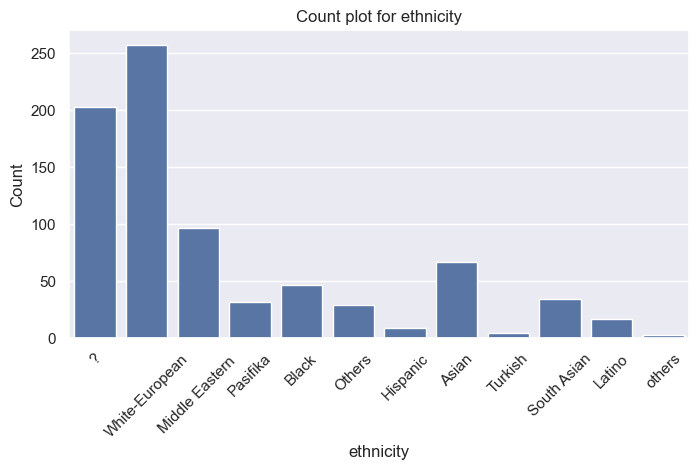

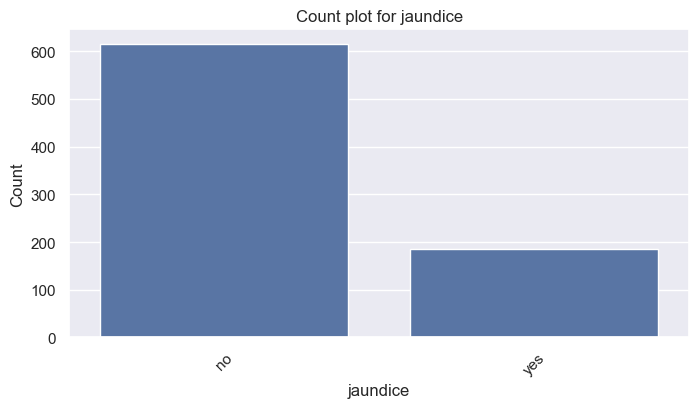

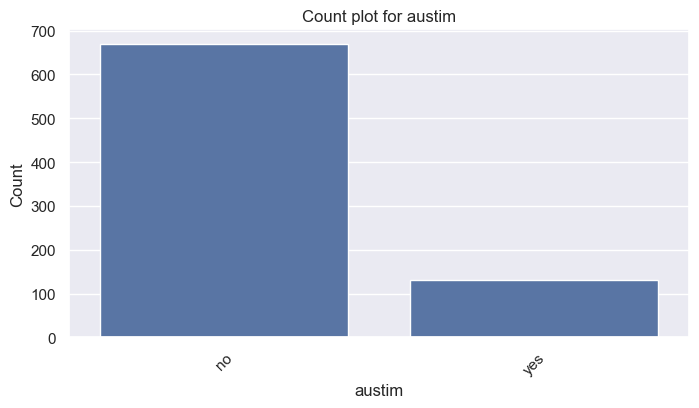

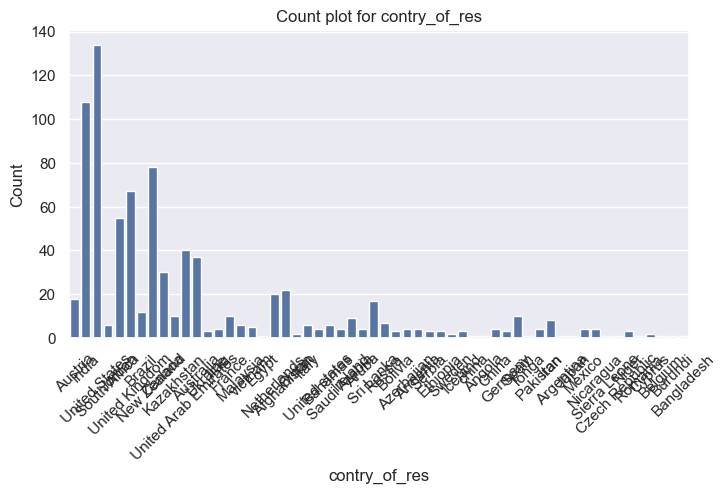

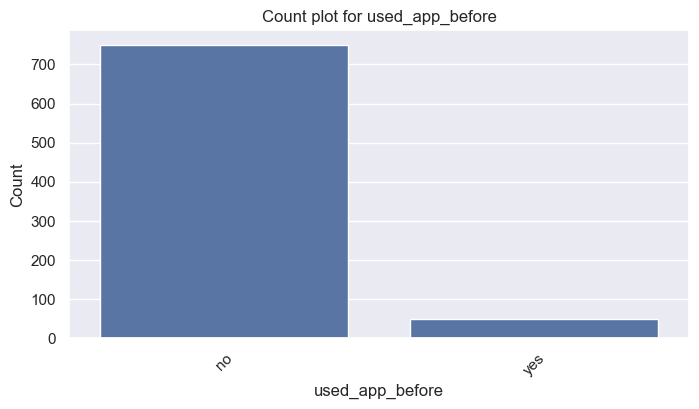

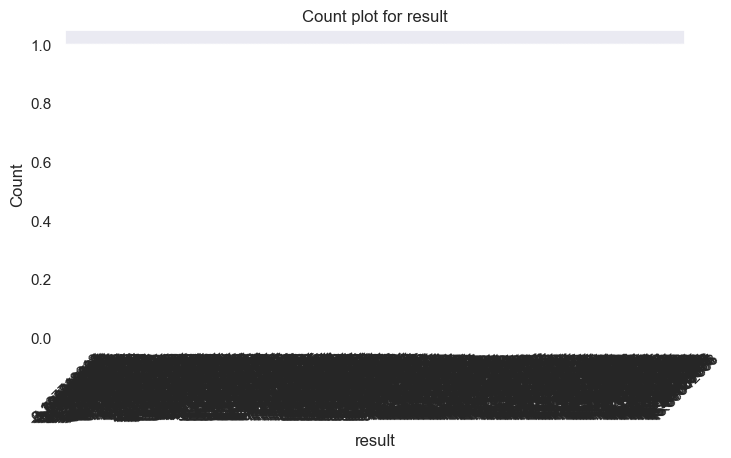

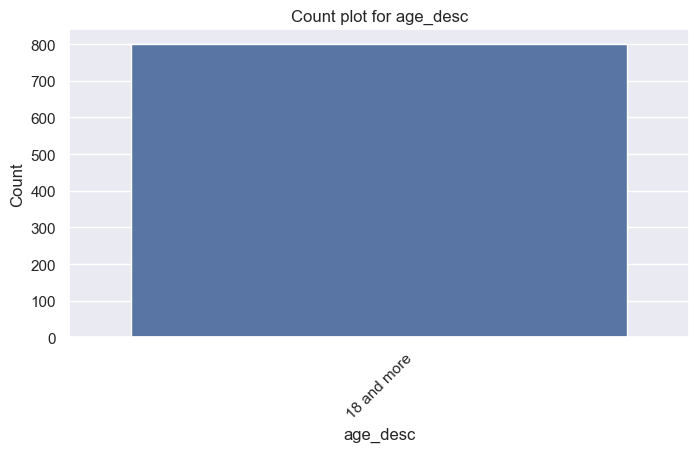

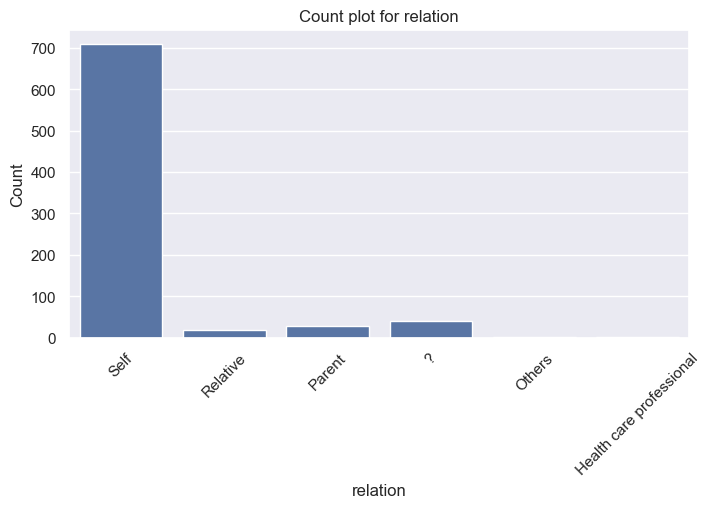

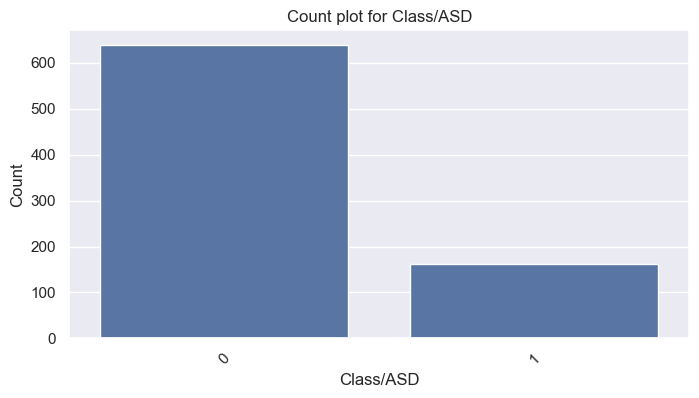

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = [
    'ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
    'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
    'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=autism_df[col])
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [179]:
autism_df["ethnicity"] = autism_df["ethnicity"].replace({ (? : "others", "Relative": "Others", "Relative": "Others", "Relative": "others", "Relative": "others", "Relative": "others",) 

SyntaxError: invalid syntax (3952871251.py, line 1)

In [82]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [83]:
autism_df["ethnicity"]

0                   ?
1                   ?
2      White-European
3                   ?
4                   ?
            ...      
795          Hispanic
796    White-European
797       South Asian
798                 ?
799                 ?
Name: ethnicity, Length: 800, dtype: object

In [88]:
autism_df["ethnicity"] .unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [125]:
object_columns =  df.select_dtypes(include = ["object"]).columns

In [92]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')


In [115]:
# Dictionary to store encoders
encoders = {}

# Loop over object (categorical) columns
for column in object_columns:
    label_encoder = LabelEncoder()  # Use correct class name
    autism_df[column] = label_encoder.fit_transform(autism_df[column])
    encoders[column] = label_encoder  # Save encoder for this column

# Save the encoders to a file
with open("encoder.pkl", "wb") as f:  # use colon, not semicolon
    pickle.dump(encoders, f)

In [116]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


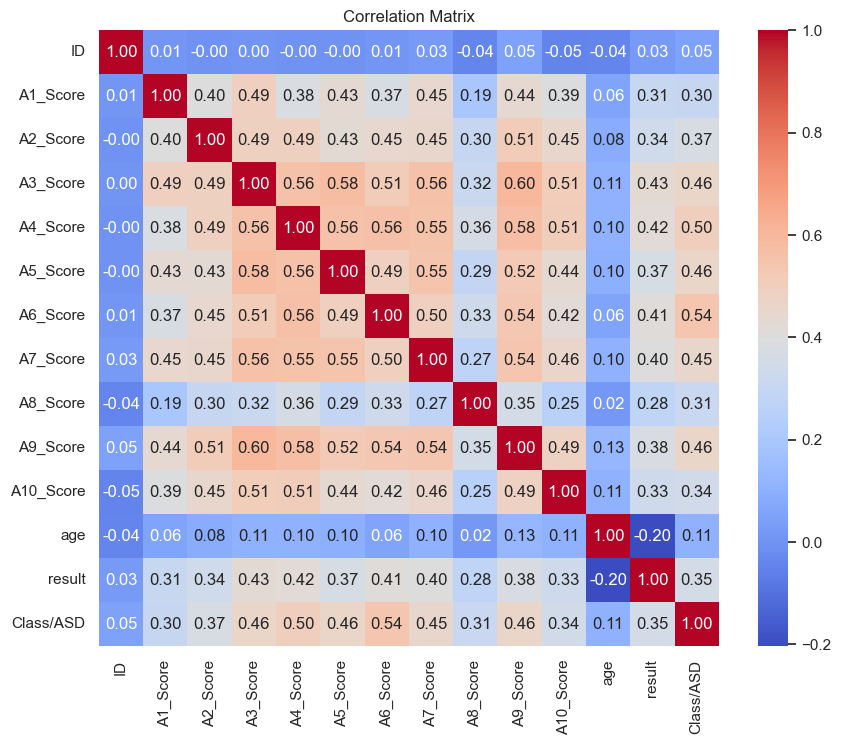

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [118]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [119]:
X = df.drop(columns = ["Class/ASD"], axis = 1)
Y = df["Class/ASD"]

In [120]:
print(X)

      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  A10_Score        age gender  \
0           1         0         1          1  38.172746      f   
1  

In [105]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [121]:
X_train, X_test, Y_test, Y_train = train_test_split(X , Y, test_size = 0.2, random_state = 42)

In [122]:
Y_test.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [123]:
smote = SMOTE(random_state=42)

In [177]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [128]:
from sklearn.preprocessing import LabelEncoder

X_encoded = autism_df.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded.drop("Class/ASD", axis=1),
    X_encoded["Class/ASD"],
    test_size=0.2,
    random_state=42
)

In [134]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

In [135]:
model = RandomForestClassifier(n_jobs=4)

In [141]:
import os

# Set the number of CPU cores you want joblib to use
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # replace 4 with the number of cores you want

In [144]:
print(Y_train_smote.shape)

(1030,)


In [145]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_encoded = X_train.copy()

# Encode only object-type columns
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Then apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_encoded, Y_train)


In [146]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_encoded = X_train.copy()

# Encode only object-type columns
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Then apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_encoded, Y_train)

In [149]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [150]:
from sklearn.model_selection import cross_val_score

cv_score = {}

for model_name, model in models.items():
    print(f"Training {model_name} with cross-validation")
    
    scores = cross_val_score(
        model, 
        X_train_smote,    # make sure the variable is spelled correctly
        Y_train_smote, 
        cv=5,             # number of folds
        scoring="accuracy"
    )
    
    cv_score[model_name] = scores
    print(f"Accuracy scores for {model_name}: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f}")
    print("-"*50)

Training Decision Tree with cross-validation
Accuracy scores for Decision Tree: [0.82038835 0.88834951 0.87864078 0.86407767 0.86407767]
Mean accuracy: 0.8631
--------------------------------------------------
Training Random Forest with cross-validation
Accuracy scores for Random Forest: [0.89320388 0.9368932  0.89320388 0.91747573 0.88834951]
Mean accuracy: 0.9058
--------------------------------------------------
Training XGBoost with cross-validation
Accuracy scores for XGBoost: [0.87864078 0.94174757 0.91747573 0.91262136 0.89805825]
Mean accuracy: 0.9097
--------------------------------------------------


In [151]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [152]:
cv_score

{'Decision Tree': array([0.82038835, 0.88834951, 0.87864078, 0.86407767, 0.86407767]),
 'Random Forest': array([0.89320388, 0.9368932 , 0.89320388, 0.91747573, 0.88834951]),
 'XGBoost': array([0.87864078, 0.94174757, 0.91747573, 0.91262136, 0.89805825])}

In [154]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [155]:
param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [1, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [156]:
param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ----------------------------
# 1. Define models
# ----------------------------
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# ----------------------------
# 2. Define hyperparameter grids
# ----------------------------
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [1, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

# ----------------------------
# 3. Setup GridSearchCV
# ----------------------------
grid_searches = {
    "Decision Tree": GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1),
    "Random Forest": GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1),
    "XGBoost": GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
}

# ----------------------------
# 4. Fit and evaluate
# ----------------------------
for model_name, gs in grid_searches.items():
    print(f"\nRunning GridSearchCV for {model_name}...")
    gs.fit(X_train_smote, Y_train_smote)  # Using SMOTE-balanced training data
    print(f"Best parameters for {model_name}: {gs.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {gs.best_score_:.4f}")
    print("-"*50)


Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy for Decision Tree: 0.8786
--------------------------------------------------

Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.9194
--------------------------------------------------

Running GridSearchCV for XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validated accuracy for XGBoost: 0.9184
--------------------------------------------------


C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:11:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [178]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encode

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [1, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [168]:
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

In [170]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:15:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:15:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:15:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\prince\Downloads\anacoda\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:15:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encode

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [1, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [171]:
best_model = None
best_score = 0

# Decision Tree
if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

# Random Forest
if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

# XGBoost
if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [173]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.92


In [174]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [176]:
Y_test_pred = best_model.predict(X_test)

print(accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

0.8
[[109  15]
 [ 17  19]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       124
           1       0.56      0.53      0.54        36

    accuracy                           0.80       160
   macro avg       0.71      0.70      0.71       160
weighted avg       0.80      0.80      0.80       160

